# Workflow for Data Analysis with 
# K-Nearest Neighbors (KNN) Classification

## 1. Define the Problem
   - **Objective**: Classify iris flowers into three species (Iris-setosa, Iris-versicolor, Iris-virginica) based on their sepal and petal measurements.
   - **Outcome**: Identify the target variable, which is the class of the iris flower.

## 2. Collect and Explore the Data
- **Data Collection**: The data is provided as a CSV file.
- **Data Exploration**:
 ```python

<Axes: xlabel='class'>

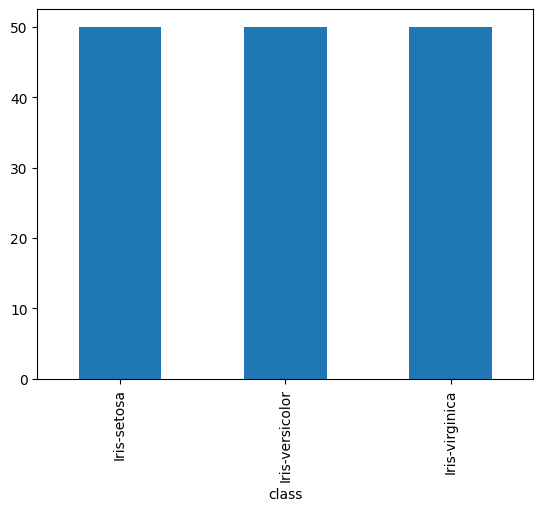

In [9]:
import pandas as pd

# Load the dataset
data = pd.read_csv('iris.data', header=None)

# Display the first few rows
data.head()

names=['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class']
data.columns = names

# Display the first few rows
data.head()


# Summary statistics
data.describe()

# Check for missing values
data.isnull().sum()

# Class distribution
data['class'].value_counts().plot(kind='bar')

## 3. Preprocess the Data
   - **Handle Missing Values**: (No missing values in this dataset)
   - **Encode Categorical Variables**:

In [11]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
data['class'] = label_encoder.fit_transform(data['class'])

- **Feature Scaling**:

In [12]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = data.drop('class', axis=1)
y = data['class']
X_scaled = scaler.fit_transform(X)

- **Split Data**:

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


## 4. Exploratory Data Analysis (EDA)
- **Correlation Analysis**:

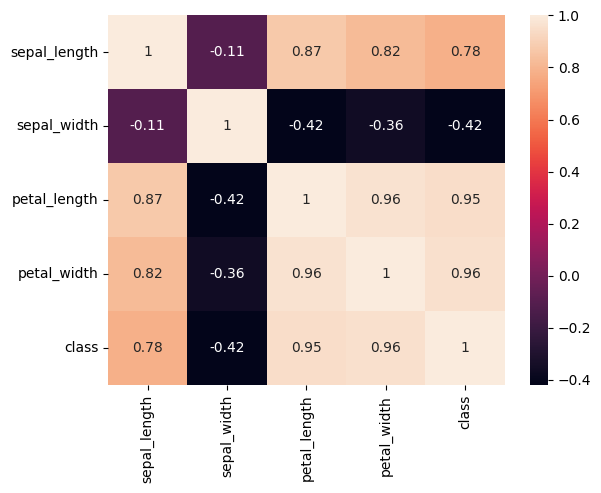

In [15]:
 import seaborn as sns
 import matplotlib.pyplot as plt
 sns.heatmap(data.corr(), annot=True)
 plt.show()

- **Feature Relationships**:

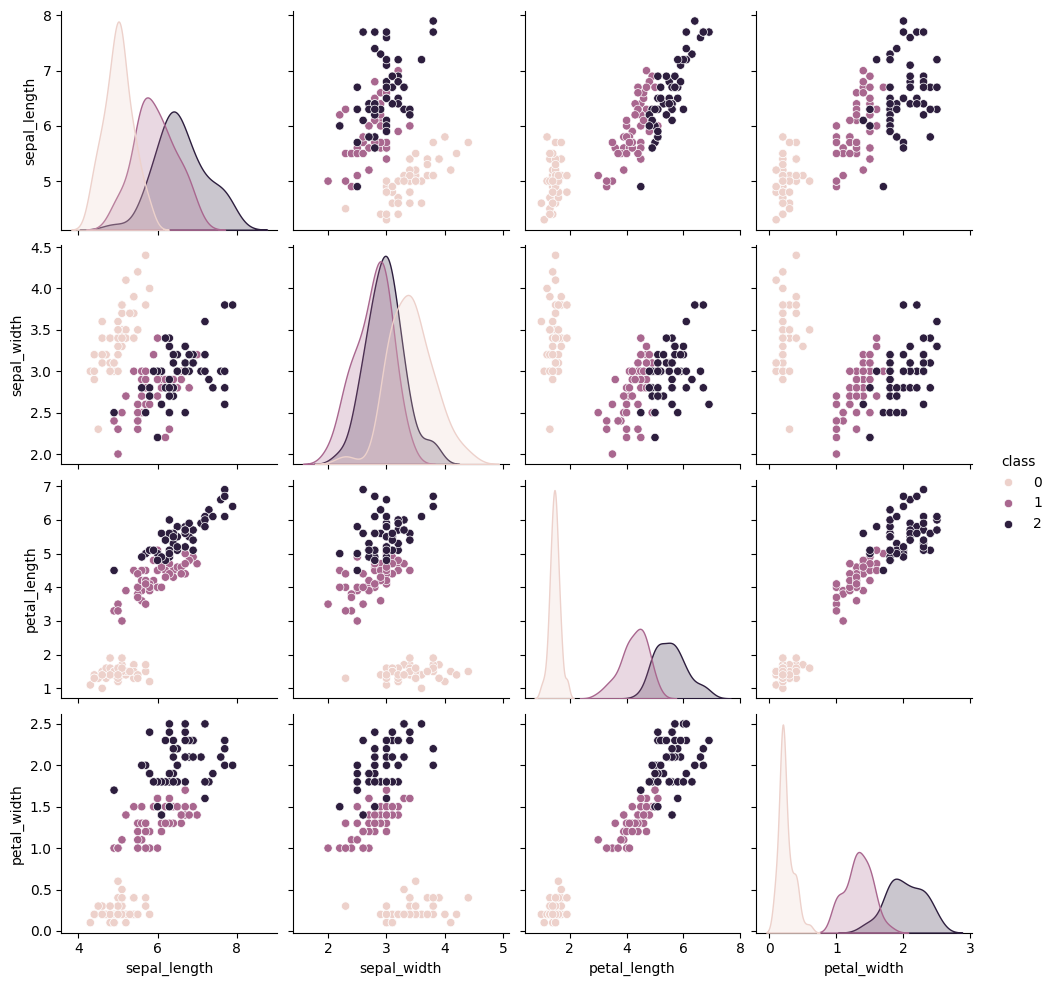

In [16]:
sns.pairplot(data, hue='class')
plt.show()

- **Class Balance**:

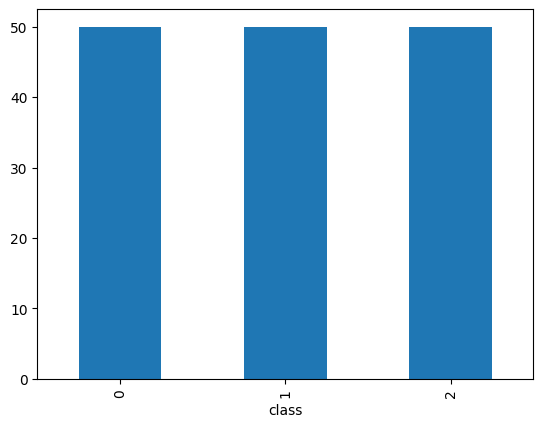

In [17]:
data['class'].value_counts().plot(kind='bar')
plt.show()

## 5. Feature Engineering
- No new features are created for this dataset.

## 6. Model Selection
- **Choose Algorithm**: K-Nearest Neighbors (KNN).

## 7. Train the Model
- **Model Training**:

In [18]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier()

- **Hyperparameter Tuning**:

In [19]:
from sklearn.model_selection import GridSearchCV
param_grid = {'n_neighbors': [3, 5, 7, 9, 11], 'weights': ['uniform', 'distance']}
grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Best parameters
grid_search.best_params_

{'n_neighbors': 9, 'weights': 'distance'}

## 8. Evaluate the Model
- **Performance Metrics**:

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



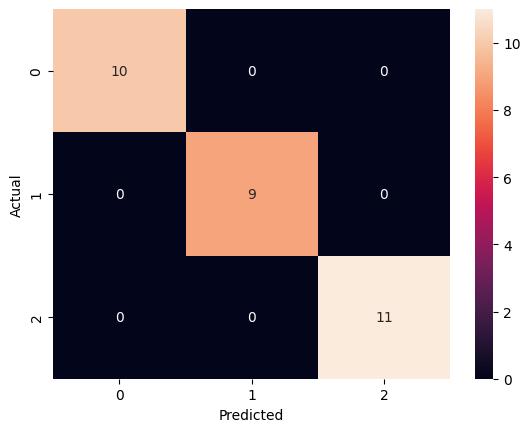

In [20]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
y_pred = knn.predict(X_test)

print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
print(f'Precision: {precision_score(y_test, y_pred, average="macro")}')
print(f'Recall: {recall_score(y_test, y_pred, average="macro")}')
print(f'F1 Score: {f1_score(y_test, y_pred, average="macro")}')
print(classification_report(y_test, y_pred))

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

## 9. Model Interpretation
- **Feature Importance**: Not applicable for KNN.
- **Model Coefficients**: Not applicable for KNN.
## 10. Model Deployment
- **Save the Model**:

In [21]:
import joblib
joblib.dump(knn, 'knn_model.pkl')

['knn_model.pkl']

- **Load the Model**:

In [23]:
 knn = joblib.load('knn_model.pkl')

## 11. Model Monitoring and Maintenance
- **Monitor Performance**: Regularly check the model's performance on new data.

## 12. Documentation and Reporting
- **Documentation**: Document all steps and decisions made.
- **Reporting**: Create visualizations and reports to communicate the findings.